# Suicides in the world - Final project

Alina Eliovich 205947443 , Guy Montal 203319991



# introduction

In our project we will try to evaluate which feature has the most impact on the number of suicides.

# The Variables in the data are:

*	 country 
*	 year : from 1985 - 2016
*	 sex : male or female
*	 age : grouped age (15-24, 25-34, 35-54, 54-74, 75+)
*	 suicides_no : suicides count
*	 population : number of people who was residents in the country at this year
*	 suicides/100k pop : suicides count rescale
*	 country-year : country with year combine
*	 HDI for year : Human Development Index, the higher the better
*	 gdp_for_year : Gross Domestic Product
*	 gdp_per_capita : Gross Domestic Product rescale
*	 generation

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#  Data set:

In [8]:
s_data = pd.read_csv("Suicide cases 1985-2016.csv")

In [9]:
s_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
s_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

We also see that the columns country-year is just a combination of the Year and Country columns, therefore we'll remove it.
we also suspect that the column 'HDI for year' has some missing values, we'll check that too. 

In [11]:
s_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Missing values&irrelevant values:

In [12]:
s_data.drop(['HDI for year',' gdp_for_year ($) '],axis=1,inplace=True)


In [13]:
s_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,796,Boomers


# Visualization of Data
We visualize data to uncover hidden patterns if any in the dataset

In order to start visualize our data and normallize for data mining, we will make a copy of our dataset for our convenience:

In [14]:
df = s_data.copy()

### Feature Encoding

Feature Encoding is important because We have to encode the values in such way that we can make numeric calculations on Object data type, it will also be crucial for our future classifier 

In [15]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
age = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
gender = {0:'female',1:'male'}

gender_coder = {'female':0,'male':1}

df['age_encoder'] = df['age'].map(age_coder)
df['sex_encoder'] = df['sex'].map(gender_coder)

In [16]:
s_df = df.groupby('age_encoder')[['suicides_no']].sum()


C:\Users\Aline\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Number of Suicide')

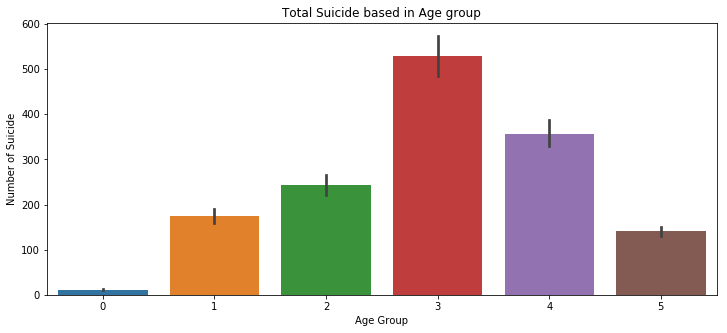

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.age_encoder,y=df.suicides_no)
plt.title("Total Suicide based in Age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Suicide")

### The most commot age to commit a suicide is between 35-54

In [18]:
generation_coder = {'G.I. Generation':0,
               'Silent':1,
               'Boomers':2, 
               'Generation X':3,
               'Millenials':4,
               'Generation Z':5}

df['generation_encoder'] = df['generation'].map(generation_coder)

df["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

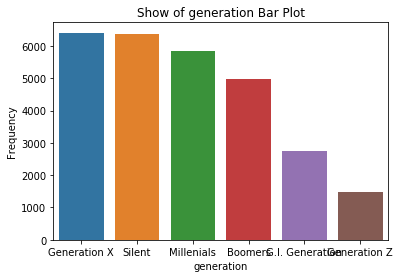

In [19]:
sns.barplot(x=df.generation.value_counts().index,y=df.generation.value_counts().values)
plt.xlabel('generation')
plt.ylabel('Frequency')
plt.title('Show of generation Bar Plot')
plt.show()

### Generation X and Silent generations are most common.

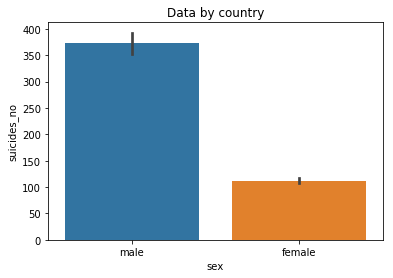

In [20]:
sns.barplot(x='sex' ,y='suicides_no', data=df)
plt.title('Data by country')
plt.show()

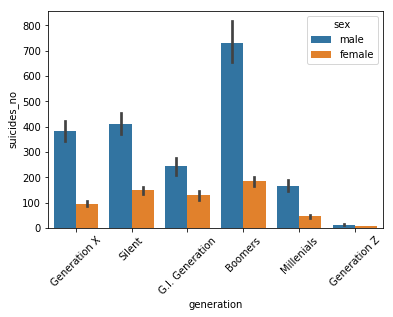

In [21]:
sns.barplot(x ='generation', y ='suicides_no', hue = "sex", data = df)
plt.xticks(rotation=45)
plt.show()

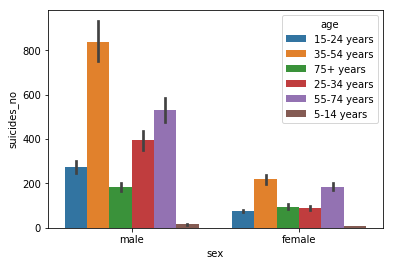

In [22]:
bar_age = sns.barplot(x='sex',y='suicides_no',hue='age',data=df)

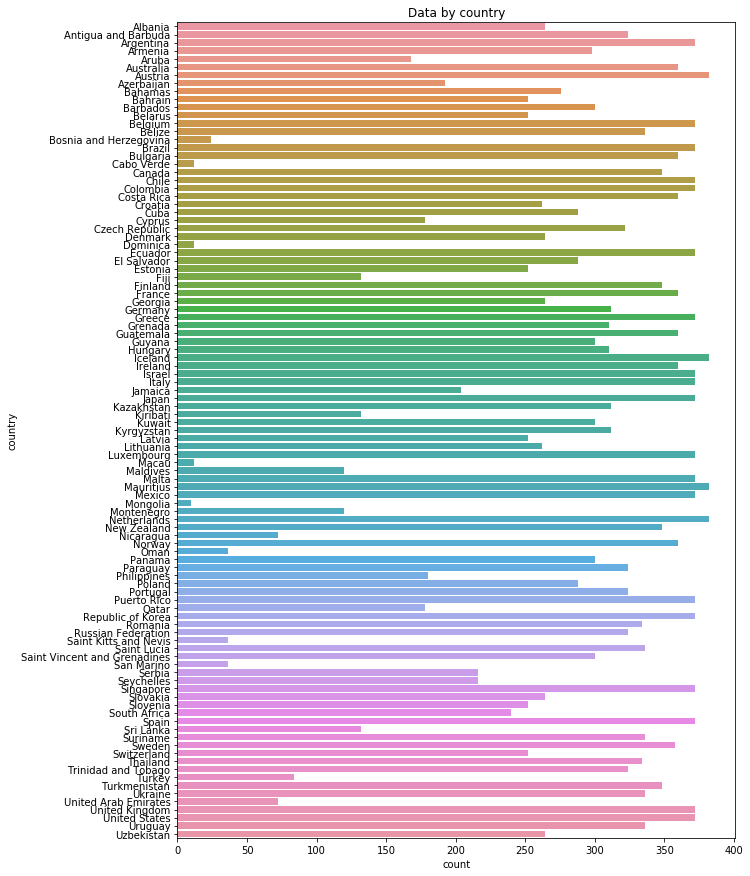

In [23]:
plt.figure(figsize=(10,15))
sns.countplot(y='country', data=df)
plt.title('Data by country')
plt.show()

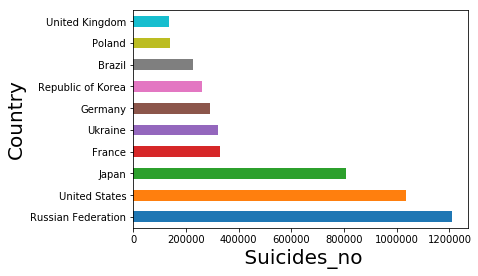

In [24]:
df.groupby(['country']).suicides_no.agg('sum').nlargest(10).plot(kind='barh')
plt.xlabel(' Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

## Calculating the correlation matrix:

In [25]:
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),age_encoder,sex_encoder,generation_encoder
year,1.000000,-0.004546,0.008850,-0.039037,3.391343e-01,2.932878e-03,0.000000e+00,0.344844
suicides_no,-0.004546,1.000000,0.616162,0.306604,6.132975e-02,7.989236e-02,1.446292e-01,-0.071691
population,0.008850,0.616162,1.000000,0.008285,8.150986e-02,-6.071612e-02,-1.124208e-02,0.059147
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,1.785134e-03,3.625866e-01,3.914965e-01,-0.335593
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000e+00,7.849172e-04,1.336263e-18,0.116436
age_encoder,0.002933,0.079892,-0.060716,0.362587,7.849172e-04,1.000000e+00,-6.453645e-19,-0.910657
sex_encoder,0.000000,0.144629,-0.011242,0.391496,1.336263e-18,-6.453645e-19,1.000000e+00,0.000000
generation_encoder,0.344844,-0.071691,0.059147,-0.335593,1.164355e-01,-9.106574e-01,0.000000e+00,1.000000


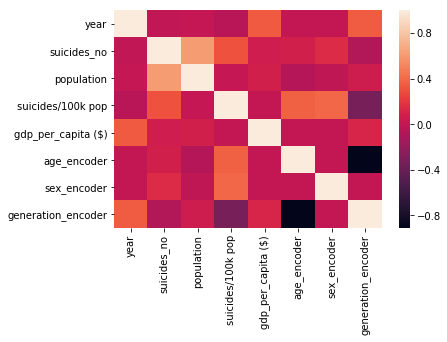

In [26]:
sns.heatmap(df.corr())
plt.show()

In [27]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation,age_encoder,sex_encoder,generation_encoder
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X,1,1,3
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,796,Generation X,1,0,3
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,796,G.I. Generation,5,1,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,796,Boomers,2,1,2


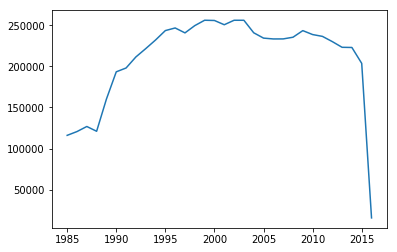

In [28]:
year = df.groupby(['year']).suicides_no.agg('sum')
plt.plot(year)

Probably we see the drop maybe because the year haven't finished - So we will drop all the data from that year.

In [29]:
df = df[df.year != 2016]

In [30]:
top20 = df.groupby(['country']).suicides_no.agg('sum').nlargest(20)
top20

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Canada                 107561
Thailand               106526
Kazakhstan             101546
Spain                  100202
Argentina               82219
Hungary                 72130
Romania                 70824
Australia               70111
Name: suicides_no, dtype: int64

In [31]:
avg_p = df.groupby('country-year').mean()[['population']]

In [32]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation,age_encoder,sex_encoder,generation_encoder
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X,1,1,3
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,796,Generation X,1,0,3
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,796,G.I. Generation,5,1,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,796,Boomers,2,1,2


First we'll start by Linear Regression. We divide the dataset into testing and training dataset:

In [33]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Fede

In [34]:
country_coder={'Albania':1, 'Antigua and Barbuda':2, 'Argentina':3, 'Armenia':4, 'Aruba':5,
       'Australia':6, 'Austria':7, 'Azerbaijan':8, 'Bahamas':9, 'Bahrain':10,
       'Barbados':11, 'Belarus':12, 'Belgium':13, 'Belize':14,
       'Bosnia and Herzegovina':15, 'Brazil':16, 'Bulgaria':17, 'Cabo Verde':18,
       'Canada':19, 'Chile':20, 'Colombia':21, 'Costa Rica':22, 'Croatia':23, 'Cuba':24,
       'Cyprus':25, 'Czech Republic':26, 'Denmark':27, 'Dominica':28, 'Ecuador':29,
       'El Salvador':30, 'Estonia':31, 'Fiji':32, 'Finland':33, 'France':34, 'Georgia':35,
       'Germany':36, 'Greece':37, 'Grenada':38, 'Guatemala':39, 'Guyana':40, 'Hungary':41,
       'Iceland':42, 'Ireland':43, 'Israel':44, 'Italy':45, 'Jamaica':46, 'Japan':47,
       'Kazakhstan':47, 'Kiribati':49, 'Kuwait':50, 'Kyrgyzstan':51, 'Latvia':52,
       'Lithuania':53, 'Luxembourg':54, 'Macau':55, 'Maldives':56, 'Malta':57,
       'Mauritius':58, 'Mexico':59, 'Montenegro':60, 'Netherlands':61, 'New Zealand':62,
       'Nicaragua':63, 'Norway':64, 'Oman':65, 'Panama':66, 'Paraguay':67, 'Philippines':68,
       'Poland':69, 'Portugal':70, 'Puerto Rico':71, 'Qatar':72, 'Republic of Korea':73,
       'Romania':74, 'Russian Federation':75, 'Saint Kitts and Nevis':76,
       'Saint Lucia':77, 'Saint Vincent and Grenadines':78, 'San Marino':79,
       'Serbia':80, 'Seychelles':81, 'Singapore':82, 'Slovakia':83, 'Slovenia':84,
       'South Africa':85, 'Spain':86, 'Sri Lanka':87, 'Suriname':88, 'Sweden':89,
       'Switzerland':90, 'Thailand':91, 'Trinidad and Tobago':92, 'Turkey':93,
       'Turkmenistan':94, 'Ukraine':95, 'United Arab Emirates':96,
       'United Kingdom':97, 'United States':98, 'Uruguay':99, 'Uzbekistan':100}



df['country_coder'] = df['country'].map(country_coder)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 14 columns):
country               27660 non-null object
year                  27660 non-null int64
sex                   27660 non-null object
age                   27660 non-null object
suicides_no           27660 non-null int64
population            27660 non-null int64
suicides/100k pop     27660 non-null float64
country-year          27660 non-null object
gdp_per_capita ($)    27660 non-null int64
generation            27660 non-null object
age_encoder           27660 non-null int64
sex_encoder           27660 non-null int64
generation_encoder    27660 non-null int64
country_coder         27660 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 3.2+ MB


# Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'gdp_per_capita ($)',
 'generation',
 'age_encoder',
 'sex_encoder',
 'generation_encoder',
 'country_coder']

In [69]:
Y = df["suicides/100k pop"]
X = df.drop(['country','sex','country-year','generation','age','suicides/100k pop'],axis=1)


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, random_state=42)

## Linear regression

In [71]:
reg = LinearRegression()
reg.fit(x_train,y_train)
ypred = reg.predict(x_test)
acc_score = reg.score(x_test,y_test)
print('LINEAR REGRESSION:')
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:
Accuracy Score is: 0.3634570860857021


In [72]:
print('Mean Squared Error:')
print(('Value : %.10f' % mean_squared_error(y_test,ypred)))

Mean Squared Error:
Value : 240.1334008194


In [73]:
feature_importances = pd.DataFrame(reg.coef_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                      importance
sex_encoder         1.273113e+01
age_encoder         4.957669e+00
generation_encoder  1.873922e+00
country_coder       2.852597e-02
suicides_no         7.034171e-03
gdp_per_capita ($)  9.325523e-06
population         -9.031669e-07
year               -2.037200e-01


Text(0, 0.5, 'Predictions')

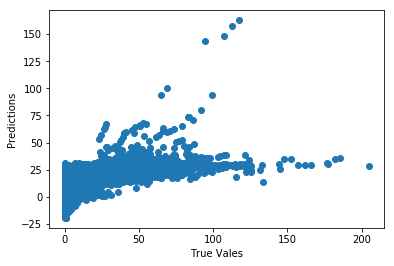

In [74]:
plt.scatter(y_test, ypred)
plt.xlabel("True Vales",)
plt.ylabel("Predictions")

In [76]:
print('Coefficients: \n', reg.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred))

Coefficients: 
 [-2.03719998e-01  7.03417072e-03 -9.03166873e-07  9.32552289e-06
  4.95766868e+00  1.27311296e+01  1.87392208e+00  2.85259659e-02]
Variance score: 0.36


In [77]:
y = df["age_encoder"]
x = df.drop(['country','sex_encoder','country-year','generation','age','sex','age_encoder'],axis=1)


In [57]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size =0.3, random_state=42)

In [58]:
reg = LinearRegression()
reg.fit(x_train1,y_train1)
ypred = reg.predict(x_test1)
acc_score = reg.score(x_test1,y_test1)
print('LINEAR REGRESSION:')
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:
Accuracy Score is: 0.9434126004336512


In [59]:
feature_importances = pd.DataFrame(reg.coef_,index = x_train1.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                      importance
year                7.233341e-02
suicides/100k pop   2.914927e-03
suicides_no         2.670052e-06
population         -2.219256e-09
gdp_per_capita ($) -1.715424e-07
country_coder      -1.211507e-04
generation_encoder -1.230191e+00


Text(0, 0.5, 'Predictions')

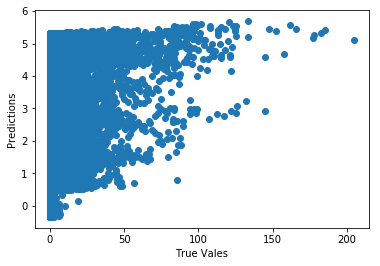

In [60]:
plt.scatter(y_test, ypred)
plt.xlabel("True Vales",)
plt.ylabel("Predictions")

### Linear regression setting can make the model extremely sensitive to noise in the data
#### So, we'll try Random Forest Regressor algorithem

## Random Forest Regressor

In [63]:
clf_rf.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = x_train, y = y_train, cv = 8,verbose = 1)
ypred = clf_rf.predict(x_test)

print('Random Forest Regressor:')
print('Value : %.10f' % clf_rf.score(x_test, y_test))

feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)


C:\Users\Aline\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest Regressor:
Value : 0.9889458946
                    importance
population            0.456228
suicides_no           0.453684
sex_encoder           0.067771
gdp_per_capita ($)    0.013678
age_encoder           0.003600
country_coder         0.002432
year                  0.002039
generation_encoder    0.000568


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.8s finished


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestRegressor()
clf_rf.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = x_train, y = y_train, cv = 8,verbose = 1)
ypred = clf_rf.predict(x_test)

print('Random Forest Regressor:')
print('Value : %.10f' % clf_rf.score(x_test, y_test))
#print(accuracies)

C:\Users\Aline\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest Regressor:
Value : 0.9879865585


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.6s finished


In [65]:
print('Mean Squared Error:')
print(('Value : %.10f' % mean_squared_error(y_test,ypred)))

Mean Squared Error:
Value : 4.5320252413


In [66]:
feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                    importance
population            0.448212
suicides_no           0.442480
sex_encoder           0.069772
gdp_per_capita ($)    0.014559
age_encoder           0.011585
generation_encoder    0.006892
country_coder         0.003773
year                  0.002727


## Results of regression:
* Linear regression : 36%
* Random Forest Regressor : 99%